# Bike Sharing Demand

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('bikes.csv', index_col=None)
print(df.head(15))
print(df.info())
print(df.describe())
print(df.isnull().sum())

    hr  holiday  workingday  temp   hum  windspeed  cnt  instant  mnth  yr  \
0    0        0           0  0.76  0.66     0.0000  149    13004     7   1   
1    1        0           0  0.74  0.70     0.1343   93    13005     7   1   
2    2        0           0  0.72  0.74     0.0896   90    13006     7   1   
3    3        0           0  0.72  0.84     0.1343   33    13007     7   1   
4    4        0           0  0.70  0.79     0.1940    4    13008     7   1   
5    5        0           0  0.68  0.79     0.1045   10    13009     7   1   
6    6        0           0  0.70  0.79     0.0896   27    13010     7   1   
7    7        0           0  0.74  0.70     0.0000   50    13011     7   1   
8    8        0           0  0.78  0.62     0.1045  142    13012     7   1   
9    9        0           0  0.82  0.56     0.0000  219    13013     7   1   
10  10        0           0  0.86  0.44     0.2985  366    13014     7   1   
11  11        0           0  0.88  0.39     0.2239  377    13015

In [9]:
X=df.drop('cnt',axis=1)
y=df.cnt

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=20)

## 1.Random Forest

In [11]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [19]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = (MSE(y_test,y_pred))**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 52.77


## 2. DecisionTree (CART)

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(X_train,y_train)

y_predict_dt = dt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = (MSE(y_test,y_predict_dt))**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 61.88


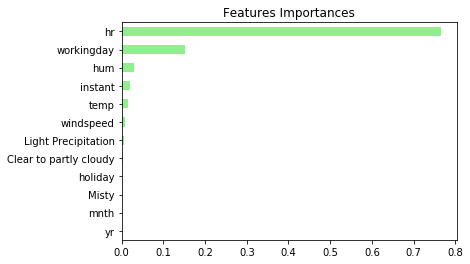

In [24]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## 3.Gradient Boosting

### Define the GB regressor


In [25]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(n_estimators=200, 
            max_depth=4,
            random_state=2)

### Train the GB regressor

In [26]:
# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

### Evaluate the GB regressor

In [27]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE  

# Compute MSE
mse_test = MSE(y_test,y_pred)

# Compute RMSE
rmse_test = (mse_test)**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 47.488


### Regression with SGB


In [28]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

### Train the SGB regressor


In [30]:
# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

### Evaluate the SGB regressor

In [32]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE 

# Compute test set MSE
mse_test = MSE(y_test,y_pred)

# Compute test set RMSE
rmse_test = (mse_test)**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 50.954


### Random forests hyperparameters


In [33]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

### Set the hyperparameter grid of RF


In [34]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[100,350,500],'max_features':['log2','auto','sqrt'],'min_samples_leaf':[2,10,30]}


### Search for the optimal forest


In [37]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=25, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt']

### Evaluate the optimal forest


In [38]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = (MSE(y_test,y_pred))**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 51.852
